<a href="https://colab.research.google.com/github/MrThetaIII/DEPI-ClassWork/blob/main/WS-2-DEPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/obesity-prediction-dataset


In [2]:
import os

# list directory files
print(os.listdir(path))

['ObesityDataSet_raw_and_data_sinthetic.csv']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path + "/ObesityDataSet_raw_and_data_sinthetic.csv")

Gender – Male or Female.

Age – Age in years.

Height – Height in meters.

Weight – Weight in kilograms.

family_history_with_overweight – Family history of overweight (yes/no).

FAVC – Frequent consumption of high-calorie food (yes/no).

FCVC – Frequency of vegetable consumption (1–3 scale).

NCP – Number of main meals per day.

CAEC – Eating between meals (no/Sometimes/Frequently/Always).

SMOKE – Smoker status (yes/no).

CH2O – Daily water intake in liters.

SCC – Monitors calorie intake (yes/no).

FAF – Physical activity per week (hours).

TUE – Daily tech use (hours).

CALC – Alcohol consumption frequency.

MTRANS – Main mode of transportation.

NObeyesdad – Obesity level (target label).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
dect = {'Normal_Weight': 1,
 'Overweight_Level_I': 2,
 'Overweight_Level_II': 3,
 'Obesity_Type_I': 4,
 'Insufficient_Weight': 0,
 'Obesity_Type_II': 5,
 'Obesity_Type_III': 6}

In [9]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0).astype(bool)
df['NObeyesdad'] = df['NObeyesdad'].apply(lambda x: dect[x]).astype(int)

In [14]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,21,1.62,64.0,True,no,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,1
1,False,21,1.52,56.0,True,no,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,1
2,True,23,1.80,77.0,True,no,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,1
3,True,27,1.80,87.0,False,no,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,2
4,True,22,1.78,89.8,False,no,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,3


In [13]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(lambda x: 1 if x == 'yes' else 0).astype(bool)
df['SMOKE'] = df['SMOKE'].apply(lambda x: 1 if x == 'yes' else 0).astype(bool)
df['SCC'] = df['SCC'].apply(lambda x: 1 if x == 'yes' else 0).astype(bool)

In [17]:
freq_dect = {'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'no': 0}

In [18]:
df['CALC'] = df['CALC'].apply(lambda x: freq_dect[x]).astype(int)
df['CAEC'] = df['CAEC'].apply(lambda x: freq_dect[x]).astype(int)

In [19]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
df_pandas_encoded = pd.get_dummies(df, columns=['MTRANS'], drop_first=True)

In [24]:
df_pandas_encoded['FAVC'] = df_pandas_encoded['FAVC'].apply(lambda x: 1 if x == 'yes' else 0).astype(bool)

In [26]:
df_pandas_encoded.describe()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,1.140692,2.008053,1.010313,0.657861,0.731407,3.112269
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.468543,0.612950,0.850613,0.608926,0.515498,1.985062
min,14.000000,1.450000,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.000000,1.585000,0.125000,0.000000,0.000000,1.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,1.000000,2.000000,1.000000,0.625000,1.000000,3.000000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,1.000000,2.480000,1.670000,1.000000,1.000000,5.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,6.000000


In [27]:
import seaborn as sns

<Axes: ylabel='Weight'>

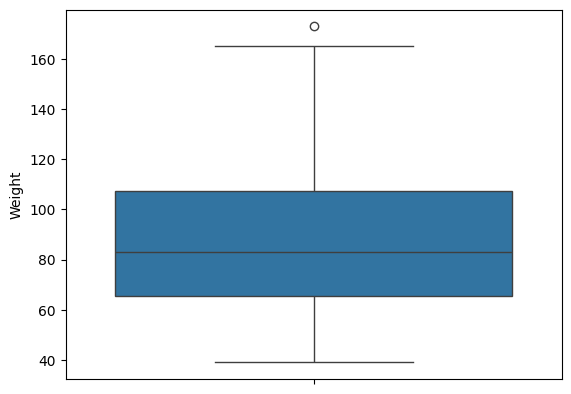

In [30]:
sns.boxplot(df_pandas_encoded['Weight'])

In [34]:
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/MrThetaIII/DEPI-WS-2.git
!git push -u origin main

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@cbe3f1ef5531.(none)')
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/MrThetaIII/DEPI-WS-2.git'
